# Coding Block 2 - Evaluation Metrics

### Load the packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.metrics import  accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report,auc
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from xgboost import XGBClassifier

'''
...
'''

'\n...\n'

### Read the dataset 

In [3]:
df = pd.read_csv("../data/diabetes.csv")
df_cleaned = pd.read_csv("../data/df_imputed_clean.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### ML Evaluation Metrics for Different Stakeholders
First, take a little time and think about different priorities that stakeholders could have when evaluating a diabetes prediction model. What might clinical healthcare providers, health insurance companies, public health officials, or patients be interested in?
What evaluation metrics are here more or less important?

### Choose two specific stakeholder perspectives for your predictive analytics task
Each perspective should emphasize a different evaluation metric. Train two predictive models based on these metrics.

Recall-Focused Model (Threshold = 0.3):
              precision    recall  f1-score   support

 No Diabetes       0.93      0.74      0.83       149
    Diabetes       0.62      0.87      0.72        70

    accuracy                           0.79       219
   macro avg       0.77      0.81      0.77       219
weighted avg       0.83      0.79      0.79       219

Precision-Focused Model (Threshold = 0.7):
              precision    recall  f1-score   support

 No Diabetes       0.80      0.89      0.84       149
    Diabetes       0.70      0.53      0.60        70

    accuracy                           0.78       219
   macro avg       0.75      0.71      0.72       219
weighted avg       0.77      0.78      0.77       219



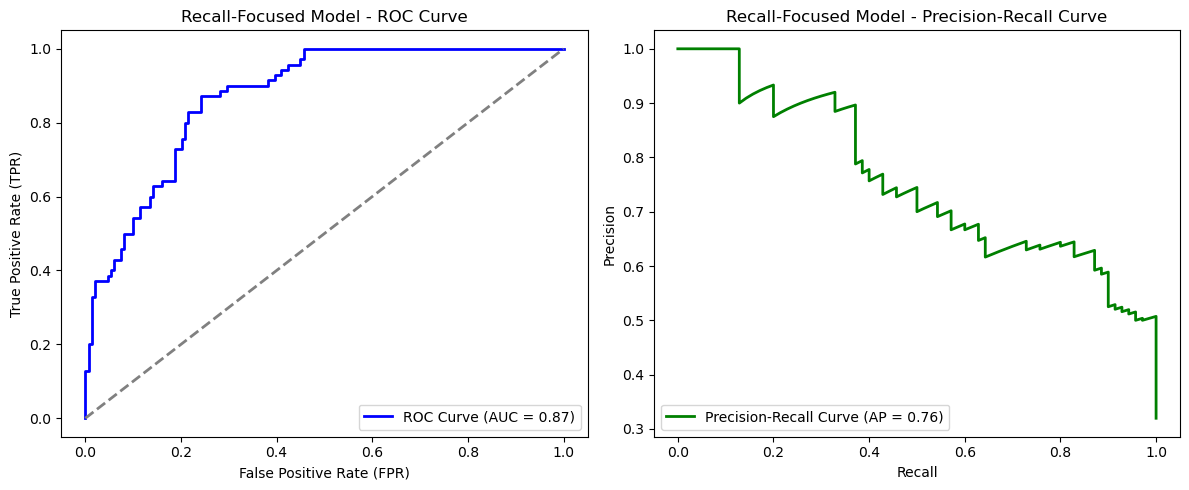

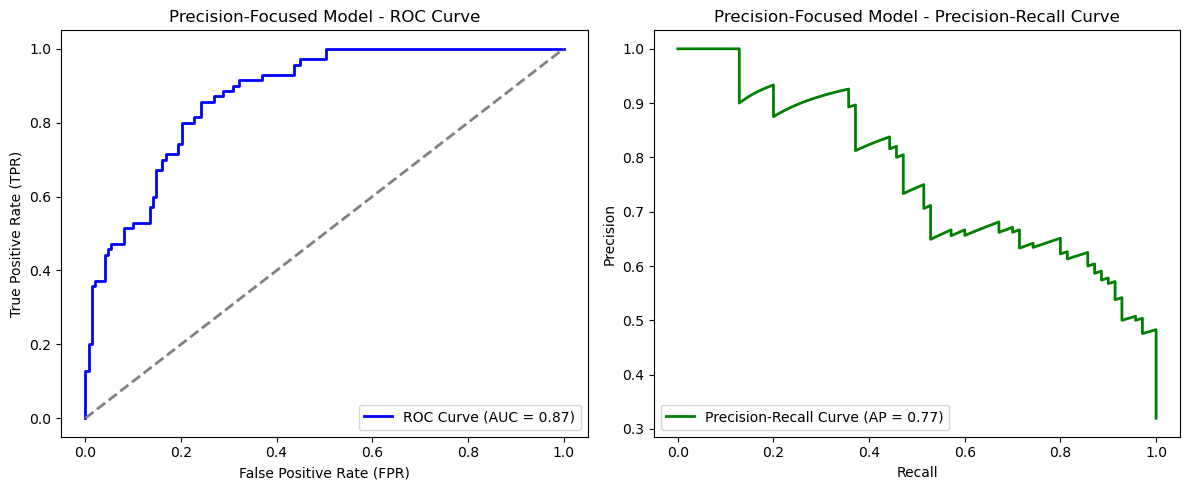

In [4]:
data = df_cleaned.copy()

# Step 2: Split the data into features (X) and target (y)
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Train an XGBoost model optimized for Recall
model_recall = XGBClassifier(random_state=42, scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train))
model_recall.fit(X_train, y_train)

# Step 5: Train an XGBoost model optimized for Precision
model_precision = XGBClassifier(random_state=42)
model_precision.fit(X_train, y_train)

# Step 6: Generate predicted probabilities for both models
y_proba_recall = model_recall.predict_proba(X_test)[:, 1]
y_proba_precision = model_precision.predict_proba(X_test)[:, 1]

# Step 7: Adjust thresholds for Recall and Precision
# For Recall: Lower threshold to increase recall
threshold_recall = 0.3
y_pred_recall = (y_proba_recall >= threshold_recall).astype(int)

# For Precision: Raise threshold to increase precision
threshold_precision = 0.7
y_pred_precision = (y_proba_precision >= threshold_precision).astype(int)

# Step 8: Evaluate the Recall-focused model
print("Recall-Focused Model (Threshold = 0.3):")
print(classification_report(y_test, y_pred_recall, target_names=["No Diabetes", "Diabetes"]))

# Step 9: Evaluate the Precision-focused model
print("Precision-Focused Model (Threshold = 0.7):")
print(classification_report(y_test, y_pred_precision, target_names=["No Diabetes", "Diabetes"]))

# Step 10: Plot ROC and Precision-Recall curves for both models
def plot_roc_pr_curves(y_true, y_proba, title):
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    roc_auc = auc(fpr, tpr)
    
    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_true, y_proba)
    average_precision = average_precision_score(y_true, y_proba)
    
    # Plot
    plt.figure(figsize=(12, 5))
    
    # ROC Curve
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(f'{title} - ROC Curve')
    plt.legend(loc='lower right')
    
    # Precision-Recall Curve
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, color='green', lw=2, label=f'Precision-Recall Curve (AP = {average_precision:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{title} - Precision-Recall Curve')
    plt.legend(loc='lower left')
    
    plt.tight_layout()
    plt.show()

# Plot for Recall-focused model
plot_roc_pr_curves(y_test, y_proba_recall, "Recall-Focused Model")

# Plot for Precision-focused model
plot_roc_pr_curves(y_test, y_proba_precision, "Precision-Focused Model")

### Implement adjustable decision thresholds
Assume that the stakeholders want a model for which they can tune the decision threshold of their evaluation metric based on their risk tolerance

Tipp: <br>
You can have the probabilities of your model given by: <br>
    <i>y_prob_clinical = clinical_model.predict_proba(X_test)[:, 1]</i> <br>
And check if the probability is above a specific threshold: <br>
    <i>y_pred = (y_prob_clinical >= threshold).astype(int)</i> <br>
Then have your evaluation metric of choice being calculated for this specific threshold.

### Insight generation
Go beyond a highly predictive model and produce some insights to your stakeholders based on your modeling results in the last days. The last cells of the  solution notebook for coding session 4 of session 3 (Wednesday) are one example on how to do this. 